In [127]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('Car_cleaned_train.csv')

# Check the first few rows
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
1,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
2,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
3,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500
4,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,29950


In [128]:
df.shape

(184706, 11)

In [129]:
df.describe(include = 'all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
count,184706,184706,184706.000000,184706.000000,184706,184706,184706,184706,184706,184706,184706.000000
unique,57,1897,NaN,NaN,7,1117,52,319,156,2,NaN
top,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,NaN
freq,22582,2878,NaN,NaN,167590,3417,48738,47774,106032,143991,NaN
mean,NaN,NaN,2015.872874,64543.598714,NaN,NaN,NaN,NaN,NaN,NaN,39235.751183
std,NaN,NaN,5.590615,47011.655291,NaN,NaN,NaN,NaN,NaN,NaN,33897.718421
min,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000
25%,NaN,NaN,2013.000000,24500.000000,NaN,NaN,NaN,NaN,NaN,NaN,17000.000000
50%,NaN,NaN,2017.000000,57690.000000,NaN,NaN,NaN,NaN,NaN,NaN,30500.000000
75%,NaN,NaN,2020.000000,94500.000000,NaN,NaN,NaN,NaN,NaN,NaN,49000.000000


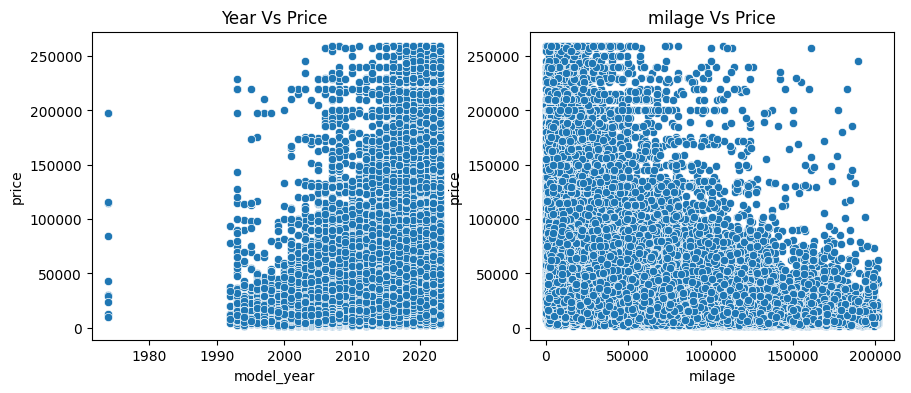

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
# plotting all the numerical columns
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x= df['model_year'], y= df['price']);
plt.title('Year Vs Price');

plt.subplot(1,3,2)
sns.scatterplot(x= df['milage'], y= df['price']);
plt.title('milage Vs Price');


 We can see some linearity in year vs price and milage vs price. As the model year of car increase, price also increase due to technology and economy. Additionally, as for the milage and price, as the car has more milage the price would decrease, opposite goes as milage is less. 

In [131]:
# Filter dataset to keep only cars from 1990 onwards
df = df[df['model_year'] >= 1995]

# Print new shape after filtering
print("Dataset size after removing old cars:", df.shape)


Dataset size after removing old cars: (184465, 11)


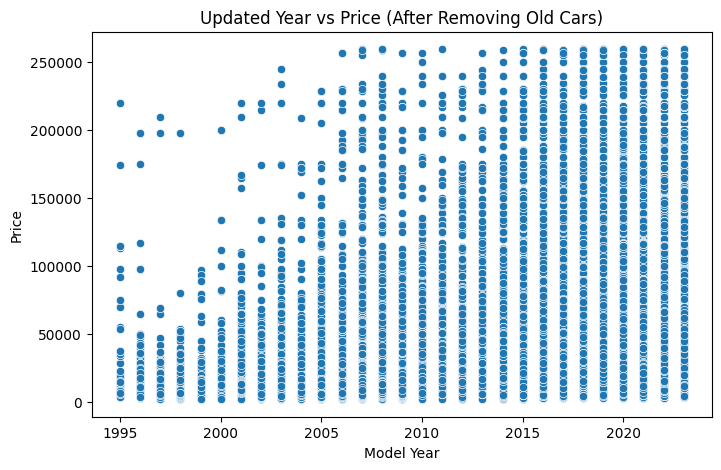

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['model_year'], y=df['price'])
plt.title('Updated Year vs Price (After Removing Old Cars)')
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()


/tmp/ipykernel_104/2470302565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


Text(0.5, 1.0, 'Price')

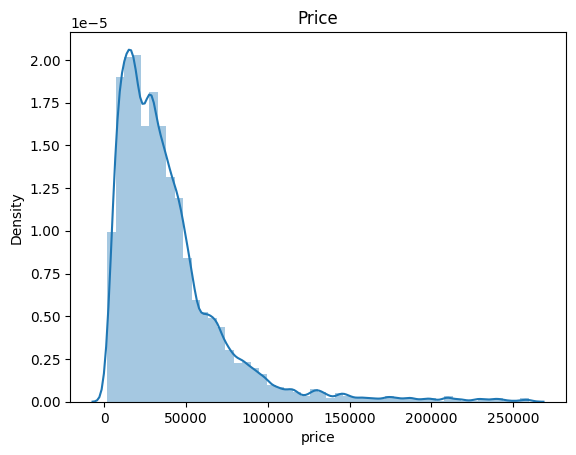

In [133]:
## Checking the price
sns.distplot(df['price']);
plt.title('Price')

In [134]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical features only (excluding target variable 'price')
features = ['model_year', 'milage']
X_vif = df[features]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF scores
print(vif_data)


      Feature       VIF
0  model_year  2.869866
1      milage  2.869866


Variance Inflation Factor (VIF) measures how much a feature is correlated with other independent variables in a regression model. A high VIF score (typically above 10) indicates strong multicollinearity, meaning a variable provides redundant information and might cause instability in the regression model.

In the dataset, VIF for milage and model_year, and both had a VIF score of ~2.87. This is well below the critical threshold of 5-10, indicating low multicollinearity. Since neither variable is highly correlated with the other, both can be safely included in the regression model without causing issues.

Additionally, PCA (Principal Component Analysis) is not necessary for milage and model_year because:

Multicollinearity is not severe (VIF < 5), meaning no feature redundancy.
Dimensionality reduction is not required, as I have only a few numerical features.
Interpretability is important – PCA transforms variables into principal components, making them harder to understand in a business context.
Since my dataset does not suffer from multicollinearity or excessive dimensionality, I can proceed with encoding categorical variables and training regression models without applying PCA. 

# Categorical variables

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184465 entries, 0 to 184705
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         184465 non-null  object
 1   model         184465 non-null  object
 2   model_year    184465 non-null  int64 
 3   milage        184465 non-null  int64 
 4   fuel_type     184465 non-null  object
 5   engine        184465 non-null  object
 6   transmission  184465 non-null  object
 7   ext_col       184465 non-null  object
 8   int_col       184465 non-null  object
 9   accident      184465 non-null  object
 10  price         184465 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 16.9+ MB


In [137]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for low-cardinality categories
df = pd.get_dummies(df, columns=['fuel_type', 'transmission', 'accident'], drop_first=True)

# Label Encoding for ordinal categories (if applicable)
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])  # Example

# Frequency Encoding for high-cardinality variables
df['model'] = df['model'].map(df['model'].value_counts())


In [138]:


# Drop 'int_col' and 'ext_col' (Interior Color)
df.drop(columns=['int_col'], inplace=True)
df.drop(columns=['ext_col'], inplace=True)
df.drop(columns=['engine'], inplace=True)

# Check the modified dataframe
print(df.head())


   brand  model  model_year  milage  price  fuel_type_E85 Flex Fuel  \
0     28     28        2002  143250   4999                        0   
1      9     58        2002  136731  13900                        1   
2     16     94        2017   19500  45000                        0   
3     36    509        2021    7388  97500                        0   
4      3     96        2018   40950  29950                        0   

   fuel_type_Gasoline  fuel_type_Hybrid  fuel_type_Plug-In Hybrid  \
0                   1                 0                         0   
1                   0                 0                         0   
2                   1                 0                         0   
3                   1                 0                         0   
4                   1                 0                         0   

   fuel_type_not supported  ...  transmission_F  transmission_M/T  \
0                        0  ...               0                 0   
1                   

In [139]:
df

,brand,model,model_year,milage,price,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,...,transmission_F,transmission_M/T,transmission_Manual,transmission_SCHEDULED FOR OR IN PRODUCTION,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,transmission_Variable,transmission_–,accident_None reported
0,28,28,2002,143250,4999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,58,2002,136731,13900,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,16,94,2017,19500,45000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,36,509,2021,7388,97500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,96,2018,40950,29950,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184701,8,550,2017,49000,27500,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
184702,36,107,2018,28600,30000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184703,36,58,2021,13650,86900,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
184704,3,265,2022,13895,84900,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184465 entries, 0 to 184705
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count   Dtype
---  ------                                                           --------------   -----
 0   brand                                                            184465 non-null  int64
 1   model                                                            184465 non-null  int64
 2   model_year                                                       184465 non-null  int64
 3   milage                                                           184465 non-null  int64
 4   price                                                            184465 non-null  int64
 5   fuel_type_E85 Flex Fuel                                          184465 non-null  uint8
 6   fuel_type_Gasoline                                               184465 non-null  uint8
 7   fuel_type_Hybrid                               

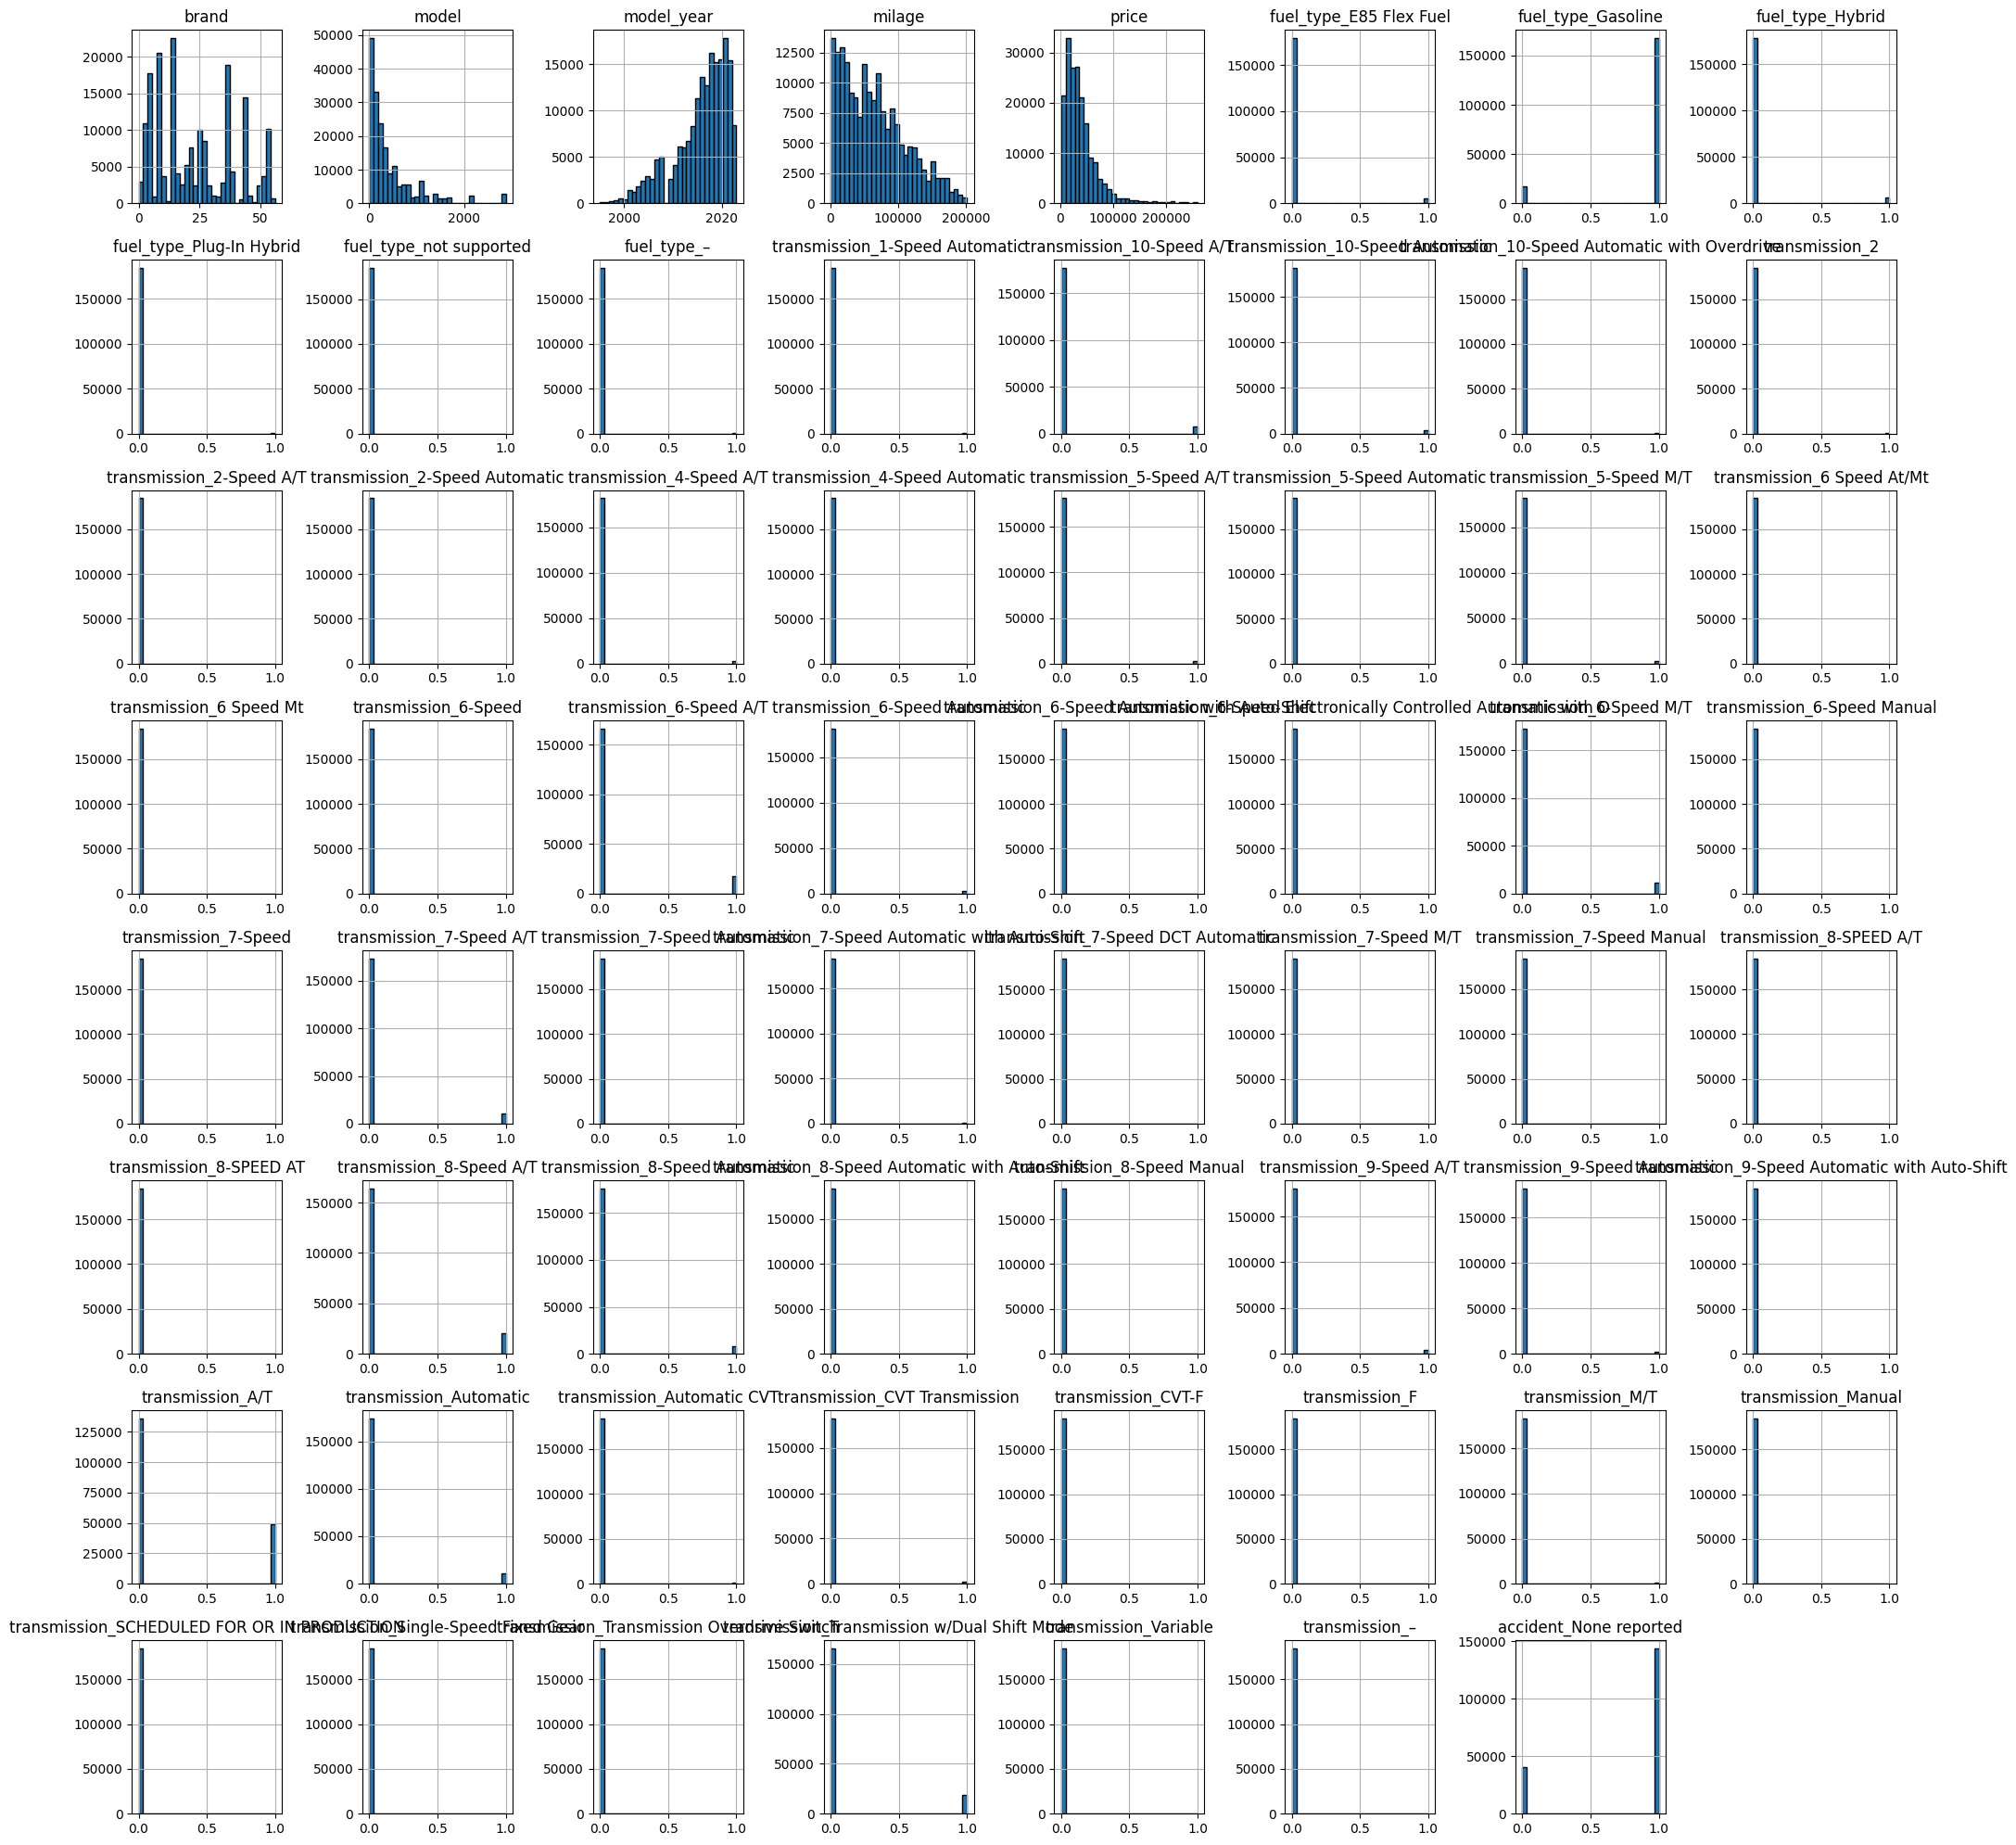

In [141]:
import matplotlib.pyplot as plt

# Set the figure size
df.hist(figsize=(20, 20), bins=30, edgecolor='black')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features (exclude categorical variables that are still object dtype)
X_vif = df.select_dtypes(include=['int64', 'float64'])

# Create an empty DataFrame to store VIF values
vif_df_all = pd.DataFrame()
vif_df_all['Feature'] = X_vif.columns  # Feature names

# Compute VIF for each feature
vif_df_all['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display results sorted by highest VIF
vif_df_all = vif_df_all.sort_values(by="VIF", ascending=False)

# Print the results
print(vif_df_all)


      Feature        VIF
2  model_year  11.294416
3      milage   4.140234
4       price   3.384802
0       brand   3.175726
1       model   1.674748


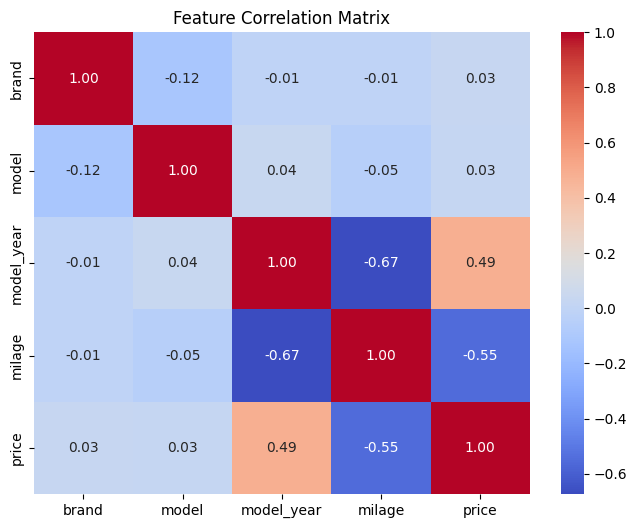

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(X_vif.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


VIF score for model_year was a bit high (~11.29), but since correlation is not extreme, we can still keep it and check model performance.

In [146]:
df.to_csv('Car_preproccesed_train.csv', index=False)
print('Data Saved')

Data Saved
